<a href="https://colab.research.google.com/github/aelkhodary/AI_ML_Coders/blob/main/Transformation_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("In this course, you’ll work with LLaVA a Large Vision Language Model (LVLM) that can process both images and text. For example, given an image of a person doing a handstand on a skateboard at the beach, LLaVA doesn't just caption the scene, it’s able to predict possible outcomes, like the person losing balance or falling off. By understanding not just what's in a video frame, but what might happen next")

**Text generation**
Now let’s see how to use a pipeline to generate some text. The main idea here is that you provide a prompt and the model will auto-complete it by generating the remaining text. This is similar to the predictive text feature that is found on many phones. Text generation involves randomness, so it’s normal if you don’t get the same results as shown below.

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation")
generator("هلا مرحبا")

In [ ]:
!pip install sqlalchemy==2.0
!pip install fsspec==2024.6.1

In [ ]:
!pip install datasets==2.14.5


In [ ]:
!pip install --upgrade datasets

In [ ]:
from transformers import AutoImageProcessor, ViTForImageClassification
import torch
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("huggingface/cats-image", trust_remote_code=True)
# Get the first image from the 'test' set
image = dataset["test"]["image"][0]

# Display the image
plt.imshow(image)
plt.axis('off')  # Remove axes
plt.show()

image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")

inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

**Mask filling**
The next pipeline you’ll try is fill-mask. The idea of this task is to fill in the blanks in a given text:

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("This course will teach you all aboutt  <mask> models.", top_k=2)

**Named entity recognition**
Named entity recognition (NER) is a task where the model has to find which parts of the input text correspond to entities such as persons, locations, or organizations. Let’s look at an example:

In [ ]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True)
ner("My name is Ahmed and I work at SCAD in Abu Dhabi.")

**Question answering**
The question-answering pipeline answers questions using information from a given context:

In [ ]:
from transformers import pipeline

question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I work and what is my name?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

**Summarization**
Summarization is the task of reducing a text into a shorter text while keeping all (or most) of the important aspects referenced in the text. Here’s an example:

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization")
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of
    graduates in traditional engineering disciplines such as mechanical, civil,
    electrical, chemical, and aeronautical engineering declined, but in most of
    the premier American universities engineering curricula now concentrate on
    and encourage largely the study of engineering science. As a result, there
    are declining offerings in engineering subjects dealing with infrastructure,
    the environment, and related issues, and greater concentration on high
    technology subjects, largely supporting increasingly complex scientific
    developments. While the latter is important, it should not be at the expense
    of more traditional engineering.

    Ahmed Elkhodary start test the model,He has 36 years old ,
    working as architect engineer.

    Rapidly developing economies such as China and India, as well as other
    industrial countries in Europe and Asia, continue to encourage and advance
    the teaching of engineering. Both China and India, respectively, graduate
    six and eight times as many traditional engineers as does the United States.
    Other industrial countries at minimum maintain their output, while America
    suffers an increasingly serious decline in the number of engineering graduates
    and a lack of well-educated engineers.
"""
)

**Translation**
For translation, you can use a default model if you provide a language pair in the task name (such as "translation_en_to_fr"), but the easiest way is to pick the model you want to use on the Model Hub. Here we’ll try translating from French to English

In [1]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")
translator("Ce cours est produit par Hugging Face.")

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[{'translation_text': 'This course is produced by Hugging Face.'}]

**Different kinds of Transformer models. Broadly, they can be grouped into three categories**:

**GPT-like** (also called auto-regressive Transformer models)
**BERT-like **(also called auto-encoding Transformer models)
**BART/T5-like** (also called sequence-to-sequence Transformer models)


All the Transformer models mentioned above (GPT, BERT, BART, T5, etc.) have been trained as language models. This means they have been trained on large amounts of raw text in a self-supervised fashion. Self-supervised learning is a type of training in which the objective is automatically computed from the inputs of the model. That means that humans are not needed to label the data!

This type of model develops a statistical understanding of the language it has been trained on, but it’s not very useful for specific practical tasks. Because of this, the general pretrained model then goes through a process called **transfer learning**. During this process, the model is fine-tuned in a supervised way — that is, using human-annotated labels — on a given task.

In [1]:
from transformers import pipeline

unmasker = pipeline("fill-mask", model="bert-base-uncased")
result = unmasker("This man works as a [MASK].")
print([r["token_str"] for r in result])

result = unmasker("This woman works as a [MASK].")
print([r["token_str"] for r in result])

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


['carpenter', 'lawyer', 'farmer', 'businessman', 'doctor']
['nurse', 'maid', 'teacher', 'waitress', 'prostitute']


In [4]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445993661880493, 0.1119738519191742, 0.04342673718929291]}

7. Select the sentence that best describes the terms “model”, “architecture”, and “weights”.
[An architecture is a succession of mathematical functions to build a model and its weights are those functions parameters.
Correct! The same set of mathematical functions (architecture) can be used to build different models by using different parameters (weights).]

True or false? A language model usually does not need labels for its pretraining.

[True: Correct! The pretraining is usually self-supervised, which means the labels are created automatically from the inputs (like predicting the next word or filling in some masked words).]

5. What does “transfer learning” mean?

Transferring the knowledge of a pretrained model to a new model by initializing the second model with the first model's weights.
Correct! Correct: when the second model is trained on a new task, it *transfers* the knowledge of the first model.

9. Which of those types of models would you use for summarizing texts?

[ A sequence-to-sequence model
Correct! Sequence-to-sequence models are perfectly suited for a summarization task.]

10. Which of these types of models would you use for classifying text inputs according to certain labels?[ An encoder model
Correct! An encoder model generates a representation of the whole sentence which is perfectly suited for a task like classification.]

11. What possible source can the bias observed in a model have?
 The model is a fine-tuned version of a pretrained model and it picked up its bias from it.
Correct! When applying Transfer Learning, the bias in the pretrained model used persists in the fine-tuned model.
 The data the model was trained on is biased.
Correct! This is the most obvious source of bias, but not the only one.
 The metric the model was optimizing for is biased.
Correct! A less obvious source of bias is the way the model is trained. Your model will blindly optimize for whatever metric you chose, without any second thoughts.

Behind the pipeline

In [1]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier(
    [
        "I've been waiting for a HuggingFace course my whole life.",
        "I hate this so much!",
    ]
)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[{'label': 'POSITIVE', 'score': 0.9598048329353333},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

**and obtained:**
[{'label': 'POSITIVE', 'score': 0.9598047137260437},
 {'label': 'NEGATIVE', 'score': 0.9994558095932007}]

**Preprocessing with a tokenizer**


In [2]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Once we have the tokenizer, we can directly pass our sentences to it and we’ll get back a dictionary that’s ready to feed to our model! The only thing left to do is to convert the list of input IDs to tensors.

You can use 🤗 Transformers without having to worry about which ML framework is used as a backend; it might be PyTorch or TensorFlow, or Flax for some models. However, Transformer models only accept tensors as input. If this is your first time hearing about tensors, you can think of them as NumPy arrays instead. A NumPy array can be a scalar (0D), a vector (1D), a matrix (2D), or have more dimensions. It’s effectively a tensor; other ML frameworks’ tensors behave similarly, and are usually as simple to instantiate as NumPy arrays.

To specify the type of tensors we want to get back (PyTorch, TensorFlow, or plain NumPy), we use the return_tensors argument:

In [14]:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


Here’s what the results look like as PyTorch tensors:

Copied
{
    'input_ids': tensor([
        [  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172, 2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,     0,     0,     0,     0,     0,     0]
    ]),
    'attention_mask': tensor([
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
    ])
}

Going through the model
We can download our pretrained model the same way we did with our tokenizer. 🤗 Transformers provides an AutoModel class which also has a from_pretrained() method:



In [4]:
from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In this code snippet, we have downloaded the same checkpoint we used in our pipeline before (it should actually have been cached already) and instantiated a model with it.

A high-dimensional vector?
The vector output by the Transformer module is usually large. It generally has three dimensions:

Batch size: The number of sequences processed at a time (2 in our example).
Sequence length: The length of the numerical representation of the sequence (16 in our example).
Hidden size: The vector dimension of each model input.


In [6]:
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

torch.Size([2, 16, 768])


Note that the outputs of 🤗 Transformers models behave like namedtuples or dictionaries. You can access the elements by attributes (like we did) or by key (outputs["last_hidden_state"]), or even by index if you know exactly where the thing you are looking for is (outputs[0]).

For our example, we will need a model with a sequence classification head (to be able to classify the sentences as positive or negative). So, we won’t actually use the AutoModel class, but AutoModelForSequenceClassification:

torch.Size([2, 16, 768])

In [7]:
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)

In [9]:
print(outputs.logits.shape)

torch.Size([2, 2])


*italicized text*
Since we have just two sentences and two labels, the result we get from our model is of shape 2 x 2.

**Postprocessing the output**

The values we get as output from our model don’t necessarily make sense by themselves. Let’s take a look:

In [10]:
print(outputs.logits)

tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward0>)


tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward0>)

Our model predicted [-1.5607, 1.6123] for the first sentence and [ 4.1692, -3.3464] for the second one. Those are not probabilities but logits, the raw, unnormalized scores outputted by the last layer of the model. To be converted to probabilities, they need to go through a SoftMax layer (all 🤗 Transformers models output the logits, as the loss function for training will generally fuse the last activation function, such as SoftMax, with the actual loss function, such as cross entropy):

In [11]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[4.0195e-02, 9.5980e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward0>)


tensor([[4.0195e-02, 9.5980e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward0>)

Now we can see that the model predicted [0.0402, 0.9598] for the first sentence and [0.9995, 0.0005] for the second one. These are recognizable probability scores.

To get the labels corresponding to each position, we can inspect the id2label attribute of the model config (more on this in the next section):

In [12]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

{0: 'NEGATIVE', 1: 'POSITIVE'}

Now we can conclude that the model predicted the following:

First sentence: NEGATIVE: 0.0402, POSITIVE: 0.9598
Second sentence: NEGATIVE: 0.9995, POSITIVE: 0.0005

We have successfully reproduced the three steps of the pipeline: preprocessing with tokenizers, passing the inputs through the model, and postprocessing! Now let’s take some time to dive deeper into each of those steps.

**Processing the data**

Continuing with the example from the previous chapter, here is how we would train a sequence classifier on one batch in PyTorch:

In [1]:
import torch
from transformers import AdamW, AutoTokenizer, AutoModelForSequenceClassification

# Same as before
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
sequences = [
    "I've been waiting for a HuggingFace course my whole life.",
    "This course is amazing!",
]
batch = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")

# This is new
batch["labels"] = torch.tensor([1, 1])

optimizer = AdamW(model.parameters())
loss = model(**batch).loss
loss.backward()
optimizer.step()

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


**Full Example**

Explanation:
Training Loop:

The code contains a loop to train the model for epochs = 3.
Zero out gradients (optimizer.zero_grad()) before each forward pass.
Forward pass: The model processes the batch to compute the loss (output.loss).
Loss Computation: The computed loss value is printed for each epoch to monitor training.
Backward pass (loss.backward()) computes the gradients.
Update weights (optimizer.step()) adjusts the model parameters using the gradients to reduce the loss.
Evaluation:

The model is set to evaluation mode (model.eval()) to turn off certain training-specific behaviors (like dropout).
New Sequences are tokenized for prediction. These are different from the training sentences to see how well the model generalizes.
Inference is performed without computing gradients (with torch.no_grad()), which makes it faster and uses less memory.
The logits are the raw scores produced by the model.
The logits are converted to predicted labels using torch.argmax(logits, dim=-1). This operation finds the index of the highest score for each input sequence, corresponding to the predicted class (0 for negative, 1 for positive).
Printing Results:

For each new sequence, the predicted sentiment (Positive or Negative) is printed.
Output Example:
After running the code, you will see output similar to the following:

yaml
Copy code
Epoch 1, Loss: 0.7023410797119141
Epoch 2, Loss: 0.6868797540664673
Epoch 3, Loss: 0.6717451810836792
Sentence: "I hate this course.", Predicted Sentiment: Negative
Sentence: "This is the best thing I've ever seen!", Predicted Sentiment: Positive
The loss decreases over epochs, indicating that the model is learning to correctly classify the training examples.
The predicted sentiment for the new sequences is output at the end, demonstrating how well the model performs after training. In this case, the model predicts "I hate this course." as Negative and "This is the best thing I've ever seen!" as Positive, which are correct based on the sentiment conveyed by each sentence.
This code demonstrates a complete cycle: training a model, adjusting weights to reduce loss, and then evaluating the model by making predictions.

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.6802880167961121
Epoch 2, Loss: 0.6153844594955444
Epoch 3, Loss: 0.5580728054046631
Epoch 4, Loss: 0.5052148699760437
Epoch 5, Loss: 0.46641185879707336
Epoch 6, Loss: 0.4264187812805176
Epoch 7, Loss: 0.3833426237106323
Epoch 8, Loss: 0.3451260030269623
Epoch 9, Loss: 0.3245052397251129
Epoch 10, Loss: 0.28141704201698303
Epoch 11, Loss: 0.26327791810035706
Epoch 12, Loss: 0.24142956733703613
Epoch 13, Loss: 0.20722012221813202
Epoch 14, Loss: 0.19657497107982635
Epoch 15, Loss: 0.18157611787319183
Epoch 16, Loss: 0.1741252988576889
Epoch 17, Loss: 0.16624663770198822
Epoch 18, Loss: 0.15530478954315186
Epoch 19, Loss: 0.1470235288143158
Epoch 20, Loss: 0.14091187715530396


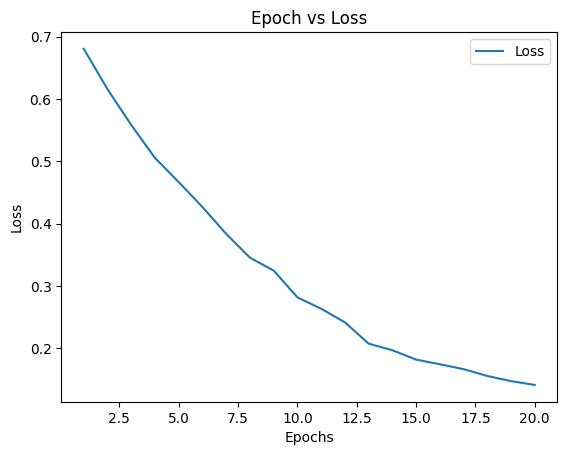

Sentence: "I hate this course.", Predicted Sentiment: Positive
Sentence: "This is the best thing I've ever seen!", Predicted Sentiment: Positive
Sentence: "انا اكره هذه الماده", Predicted Sentiment: Positive


In [3]:
import torch
import matplotlib.pyplot as plt
from transformers import AdamW, AutoTokenizer, AutoModelForSequenceClassification

# Load the model and tokenizer
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

# Define the sequences
sequences = [
    "I've been waiting for a HuggingFace course my whole life.",
    "This course is amazing!",
    "This course is bad!"
]

# Tokenize the sequences
batch = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")

# Add labels to the batch (positive sentiment = 1, negative sentiment = 0)
batch["labels"] = torch.tensor([1, 1, 0])

# Move the model and data to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
batch = {k: v.to(device) for k, v in batch.items()}

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Track the loss during training
loss_values = []

# Training the model for a few iterations
epochs = 20
for epoch in range(epochs):
    # Zero out gradients
    optimizer.zero_grad()

    # Forward pass - calculate loss
    output = model(**batch)
    loss = output.loss
    loss_values.append(loss.item())  # Track loss
    print(f"Epoch {epoch + 1}, Loss: {loss.item()}")

    # Backward pass - compute gradients
    loss.backward()

    # Update weights
    optimizer.step()

# Plotting the loss curve (Epoch vs Loss)
plt.plot(range(1, epochs + 1), loss_values, label="Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.show()

# Evaluation - using the model to make predictions
model.eval()  # Set the model to evaluation mode

# Define new sequences to predict
new_sequences = [
    "I hate this course.",
    "This is the best thing I've ever seen!",
    "انا اكره هذه الماده",
]

# Tokenize the new sequences
new_batch = tokenizer(new_sequences, padding=True, truncation=True, return_tensors="pt")
new_batch = {k: v.to(device) for k, v in new_batch.items()}

# Get predictions
with torch.no_grad():  # Disable gradient calculation for inference
    outputs = model(**new_batch)
    logits = outputs.logits  # Get the raw output scores (logits)

# Convert logits to predicted labels
predictions = torch.argmax(logits, dim=-1)
predicted_labels = predictions.cpu().numpy()

# Print the results
for sentence, label in zip(new_sequences, predicted_labels):
    sentiment = "Positive" if label == 1 else "Negative"
    print(f"Sentence: \"{sentence}\", Predicted Sentiment: {sentiment}")


**Processing the data**

In [4]:
import torch
from transformers import AdamW, AutoTokenizer, AutoModelForSequenceClassification

# Same as before
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
sequences = [
    "I've been waiting for a HuggingFace course my whole life.",
    "This course is amazing!",
]
batch = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")

# This is new
batch["labels"] = torch.tensor([1, 1])

optimizer = AdamW(model.parameters())
loss = model(**batch).loss
loss.backward()

optimizer.step()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
!pip install datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.7 MB/s eta 0:00:00


In [24]:
from datasets import load_dataset

raw_datasets = load_dataset("glue", "mrpc")
print(raw_datasets)


DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})


In [5]:
raw_train_dataset = raw_datasets["train"]
raw_train_dataset[0]

{'sentence1': 'Amrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence .',
 'sentence2': 'Referring to him as only " the witness " , Amrozi accused his brother of deliberately distorting his evidence .',
 'label': 1,
 'idx': 0}

We can see the labels are already integers, so we won’t have to do any preprocessing there. To know which integer corresponds to which label, we can inspect the features of our raw_train_dataset. This will tell us the type of each column:

Behind the scenes, label is of type ClassLabel, and the mapping of integers to label name is stored in the names folder. 0 corresponds to not_equivalent, and 1 corresponds to equivalent.

In [6]:
raw_train_dataset.features

{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'label': ClassLabel(names=['not_equivalent', 'equivalent'], id=None),
 'idx': Value(dtype='int32', id=None)}

To preprocess the dataset, we need to convert the text to numbers the model can make sense of. As you saw in the previous chapter, this is done with a tokenizer. We can feed the tokenizer one sentence or a list of sentences, so we can directly tokenize all the first sentences and all the second sentences of each pair like this:



from transformers import AutoTokenizer

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tokenized_sentences_1 = tokenizer(raw_datasets["train"]["sentence1"])
tokenized_sentences_2 = tokenizer(raw_datasets["train"]["sentence2"])


However, we can’t just pass two sequences to the model and get a prediction of whether the two sentences are paraphrases or not. We need to handle the two sequences as a pair, and apply the appropriate preprocessing. Fortunately, the tokenizer can also take a pair of sequences and prepare it the way our BERT model expects:

In [17]:
from transformers import AutoTokenizer

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tokenized_sentences_1 = tokenizer(raw_datasets["train"]["sentence1"])
tokenized_sentences_2 = tokenizer(raw_datasets["train"]["sentence2"])

inputs = tokenizer("This is the first sentence." ,padding=True, truncation=True, return_tensors="pt")
inputs

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [21]:
inputs = tokenizer("This is the first sentence.", "This is the second one.")
inputs

{'input_ids': [101, 2023, 2003, 1996, 2034, 6251, 1012, 102, 2023, 2003, 1996, 2117, 2028, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

We discussed the input_ids and attention_mask keys in Chapter 2, but we put off talking about token_type_ids. In this example, this is what tells the model which part of the input is the first sentence and which is the second sentence.

In [22]:
#If we decode the IDs inside input_ids back to words:

tokenizer.convert_ids_to_tokens(inputs["input_ids"])

['[CLS]',
 'this',
 'is',
 'the',
 'first',
 'sentence',
 '.',
 '[SEP]',
 'this',
 'is',
 'the',
 'second',
 'one',
 '.',
 '[SEP]']

So we see the model expects the inputs to be of the form [CLS] sentence1 [SEP] sentence2 [SEP] when there are two sentences. Aligning this with the token_type_ids gives us:

['[CLS]', 'this', 'is', 'the', 'first', 'sentence', '.', '[SEP]', 'this', 'is', 'the', 'second', 'one', '.', '[SEP]']
[      0,      0,    0,     0,       0,          0,   0,       0,      1,    1,     1,        1,     1,   1,       1]

As you can see, the parts of the input corresponding to [CLS] sentence1 [SEP] all have a token type ID of 0, while the other parts, corresponding to sentence2 [SEP], all have a token type ID of 1.

Now that we have seen how our tokenizer can deal with one pair of sentences, we can use it to tokenize our whole dataset: like in the previous chapter, we can feed the tokenizer a list of pairs of sentences by giving it the list of first sentences, then the list of second sentences. This is also compatible with the padding and truncation options we saw in Chapter 2. So, one way to preprocess the training dataset is:

In [29]:
tokenized_dataset = tokenizer(
    raw_datasets["train"]["sentence1"],
    raw_datasets["train"]["sentence2"],
    padding=True,
    truncation=True,
)
#tokenized_dataset


In [28]:
def tokenize_function(example):
    return tokenizer(example["sentence1"], example["sentence2"], truncation=True)


tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
tokenized_datasets

Map:   0%|          | 0/3668 [00:00<?, ? examples/s]

Map:   0%|          | 0/408 [00:00<?, ? examples/s]

Map:   0%|          | 0/1725 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1725
    })
})

In [4]:
!pip install langchain langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00


In [8]:
from transformers import pipeline
from langchain.llms import HuggingFacePipeline

# Initialize a Hugging Face pipeline for text generation
#generator = pipeline("text-generation", model="nvidia/Llama-3.1-Nemotron-70B-Instruct-HF") # size 123G
generator = pipeline("text-generation", model="gpt2") # size 600MB
llm = HuggingFacePipeline(pipeline=generator)

# Generate text using the pipeline
response = llm("Explain the concept of love.")
print(response)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Explain the concept of love. For example, in the early 20th century women were allowed in all kinds of institutions and was considered a social equalizer by their husbands. It was in fact frowned upon in Western society by their husbands to have more
